Connect with klab and charge the landcover of the years 1992 to 2010

In [55]:
#Create image landcover.tif
from Connect_Klab import main as connect_klab
for i in range(1992,2011):
    connect_klab(2.66,3.086,15.946,14.41,i, 'landcover'+str(i))

- try Remote Engine connection ....
* connection to http://127.0.0.1:8283/modeler was successfully established. session: se469iwe0zs
landcover:LandCoverType dataset successfully retrieved. File saved: landcover2008.tif


In [1]:
import rasterio
from rasterio.plot import show, show_hist
from matplotlib import pyplot

Show the landcover of 1992 in order to see if the charge goes well

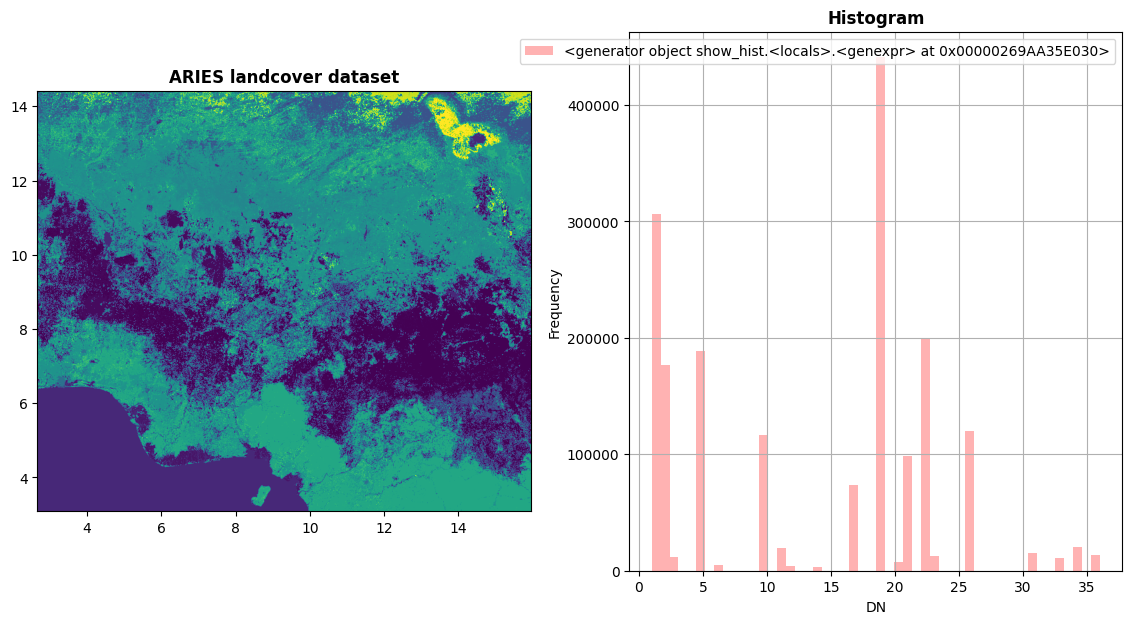

In [2]:
# Show image landcover.tif
with rasterio.open("landcover1992.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='ARIES landcover dataset')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)

    pyplot.show()

We charge the data of the pixels in lists

In [57]:
print("start connecting")
modis_stack = []
years=list(range(1992,2011))
j=0
for i in years:
        with rasterio.open(f'landcover{i}.tif') as src:
            modis_stack.append(src.read())
       # length()
        print("Se ha hecho "+str(i))
        print("es el "+str(years.index(i)))
        print(modis_stack[years.index(i)-j].shape)

Empezamos a cargar
Se ha hecho 1992
es el 0
(1, 1253, 1472)
Se ha hecho 1993
es el 1
(1, 1253, 1472)
Se ha hecho 1994
es el 2
(1, 1253, 1472)
Se ha hecho 1995
es el 3
(1, 1253, 1472)
Se ha hecho 1996
es el 4
(1, 1253, 1472)
Se ha hecho 1997
es el 5
(1, 1253, 1472)
Se ha hecho 1998
es el 6
(1, 1253, 1472)
Se ha hecho 1999
es el 7
(1, 1253, 1472)
Se ha hecho 2000
es el 8
(1, 1253, 1472)
Se ha hecho 2001
es el 9
(1, 1253, 1472)
Se ha hecho 2002
es el 10
(1, 1253, 1472)
Se ha hecho 2003
es el 11
(1, 1253, 1472)
Se ha hecho 2004
es el 12
(1, 1253, 1472)
Se ha hecho 2005
es el 13
(1, 1253, 1472)
Se ha hecho 2006
es el 14
(1, 1253, 1472)
Se ha hecho 2007
es el 15
(1, 1253, 1472)
Se ha hecho 2008
es el 16
(1, 1253, 1472)
Se ha hecho 2009
es el 17
(1, 1253, 1472)
Se ha hecho 2010
es el 18
(1, 1253, 1472)


we have a vector with every year each element, we see wich pixels in the image has changed

In [11]:
import numpy as np

We create a vector with the differences of each pixel of each map

In [63]:
difference=[]
change_map=[]
for a in range(len(years)-1):
    difference.append(np.abs(modis_stack[a] - modis_stack[a+1]))
    change_map.append(np.where(difference[a] > 0, 1, 0))
#print(difference[a].shape)
#print(len(change_map))
#for i in range(1253):
#    for j in range(1472):
#        if change_map[0,i,j]!=0:
#            print("En la posicion"+str(i)+" "+str(j)+" he cambiado, antes era "+str(modis_stack[0][0,i,j])+" y ahora soy "+str(modis_stack[1][0,i,j]))

(1, 1253, 1472)
18


we create two vector, cambio and come, in cambio it appears which pixels have gone to other landscapes, in come it says which pixels they have become to this landscape

In [103]:
cambio=[[0 for k in range(38)] for o in range(38)]
come=[[0 for k in range(38)] for o in range(38)]
for a in range(len(years)-1):
    for i in range(1253):
        for j in range(1472):
            if change_map[a][0,i,j]!=0:
                cambio[modis_stack[a][0,i,j]][modis_stack[a+1][0,i,j]]+=1
                come[modis_stack[a+1][0,i,j]][modis_stack[a][0,i,j]]+=1


It says how many changes have been from one landcover to another

In [49]:
for i in range(37):
    for j in range(37):
        if cambio[i][j]>1:
            print("Ha habido "+str(cambio[i][j])+" cambios de "+str(i)+" a "+str(j))


Ha habido 17 cambios de 1 a 2
Ha habido 10 cambios de 1 a 21
Ha habido 3 cambios de 1 a 26
Ha habido 9 cambios de 2 a 1
Ha habido 12 cambios de 2 a 5
Ha habido 2 cambios de 2 a 10
Ha habido 3 cambios de 2 a 14
Ha habido 334 cambios de 2 a 17
Ha habido 4047 cambios de 2 a 19
Ha habido 4 cambios de 2 a 20
Ha habido 100 cambios de 2 a 21
Ha habido 7 cambios de 2 a 22
Ha habido 17 cambios de 2 a 23
Ha habido 453 cambios de 2 a 26
Ha habido 3 cambios de 3 a 2
Ha habido 16 cambios de 3 a 5
Ha habido 10 cambios de 3 a 14
Ha habido 2 cambios de 3 a 17
Ha habido 15 cambios de 3 a 19
Ha habido 2 cambios de 3 a 21
Ha habido 12 cambios de 5 a 1
Ha habido 11 cambios de 5 a 2
Ha habido 33 cambios de 5 a 3
Ha habido 15 cambios de 5 a 10
Ha habido 13 cambios de 5 a 17
Ha habido 48 cambios de 5 a 19
Ha habido 8 cambios de 5 a 21
Ha habido 8 cambios de 5 a 22
Ha habido 6 cambios de 5 a 23
Ha habido 7 cambios de 5 a 26
Ha habido 3 cambios de 5 a 33
Ha habido 33 cambios de 5 a 36
Ha habido 5 cambios de 6 

In [50]:
etiqueta=['year', 'EvergreenConiferousForest', 'OpenDeciduousBroadleafForest', 'Shrubland', 'Mangrove', 'OpenDeciduousConiferousForest', 'WaterBody', 'BareArea', 'ClosedDecidousBroadleafForest', 'ClosedDeciduousConiferousForest', 'BeachDuneAndSand', 'Grassland', 'OpenSavanna', 'DeciduousBroadleafforest', 'sparseShrubCover', 'artificialSurface', 'OpenEvergreenConiferousForest', 'SparseTreeCover', 'NonIrregatedArableLandHerbaceous', 'closedEvergreenConiferousforest', 'NonIrrigatedArableLand', 'ClosedSavanna', 'AgriculturalLandWithNaturalVegetation', 'evergreeenBroadleadForest', 'PermanentlyIrrigatedArableLand', 'DeciduousConferousForest', 'MixedForest', 'ComplexCultivationPatternedLand', 'InlandSwamp', 'GlacierPerpetualSnow', 'evergreenShrubland', 'LichenMoss', 'DeciduousShrubland"', 'BareRock', 'SparseVegetation', 'SparseHerbaceousCover', 'PermanentCropland', 'Wetland']

In [66]:
import matplotlib.pyplot as plt

We represent how many pixels have become to another landcover that before were this landcover and how many have become to this landcover

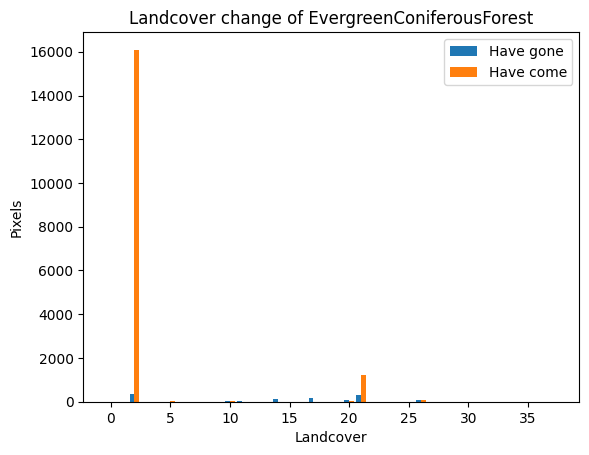

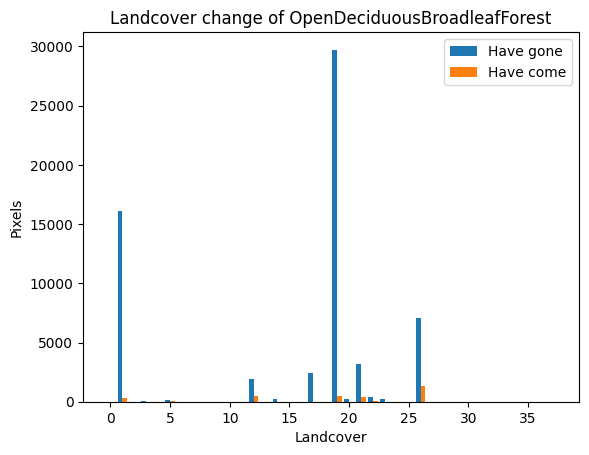

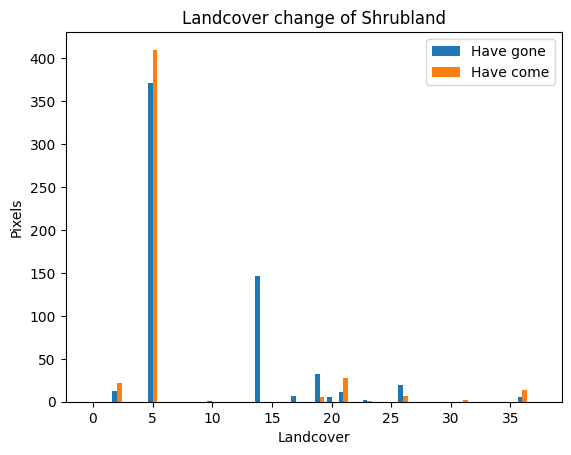

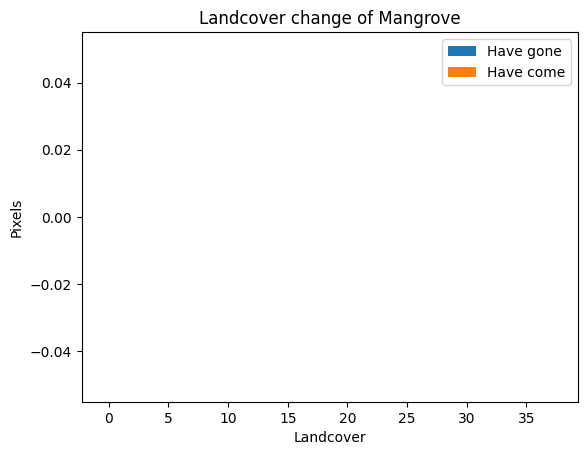

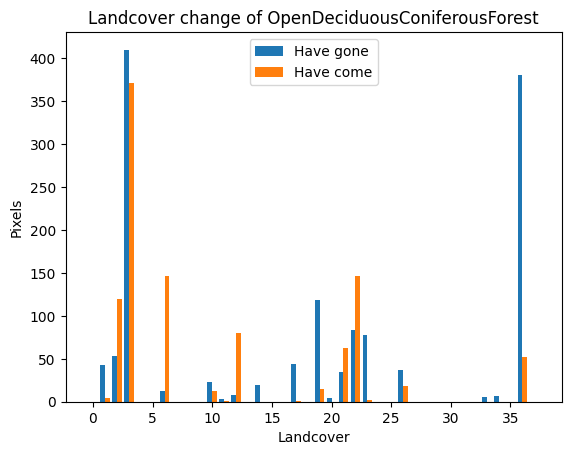

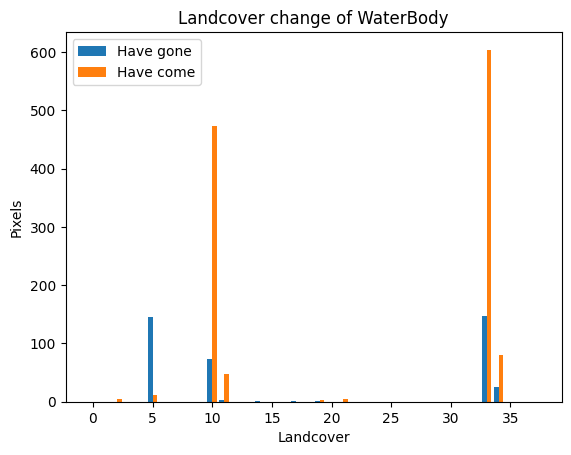

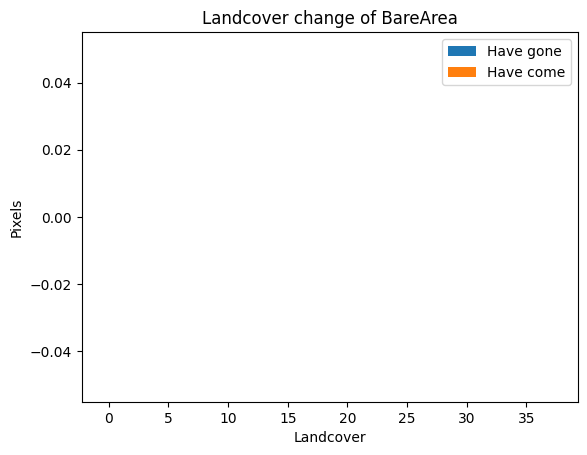

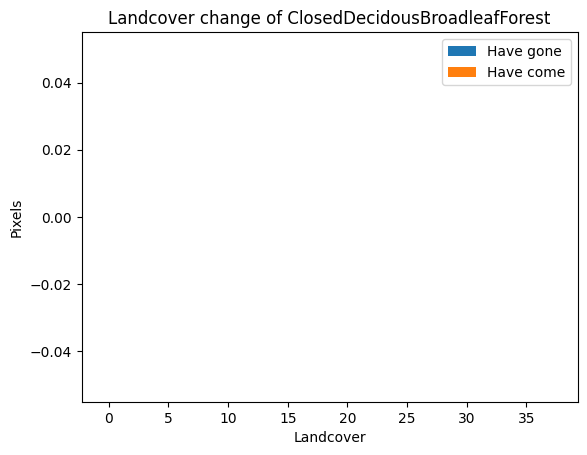

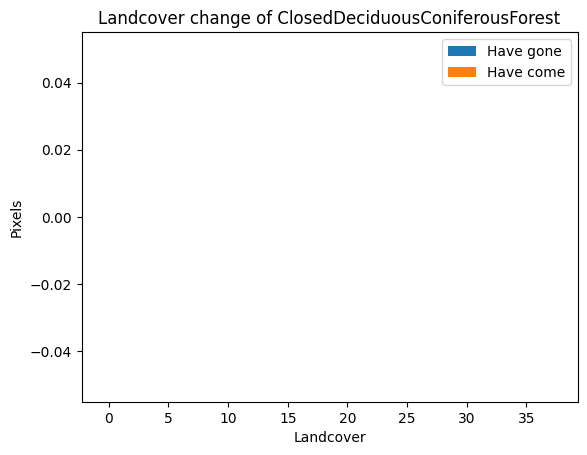

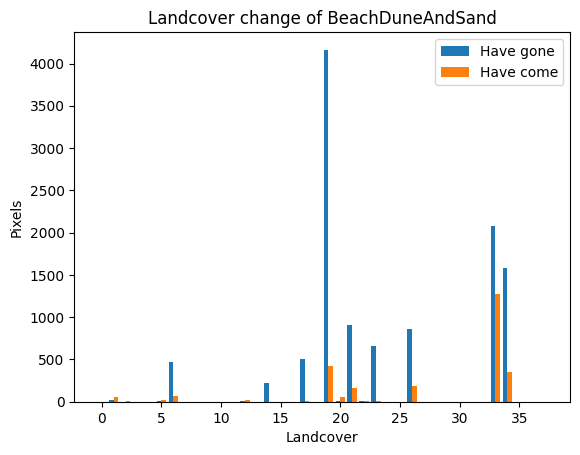

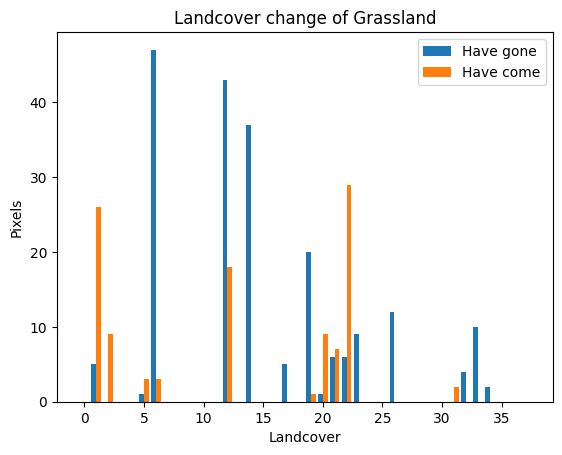

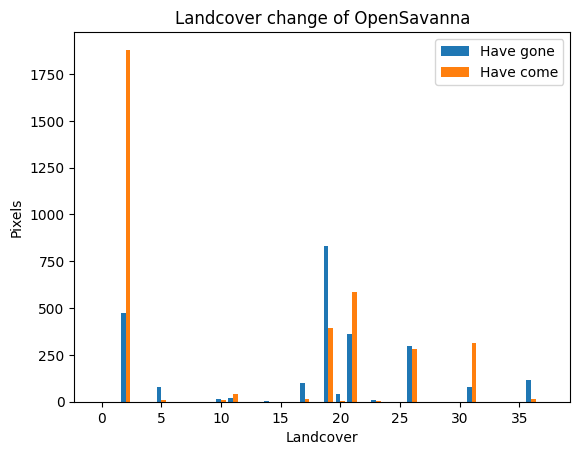

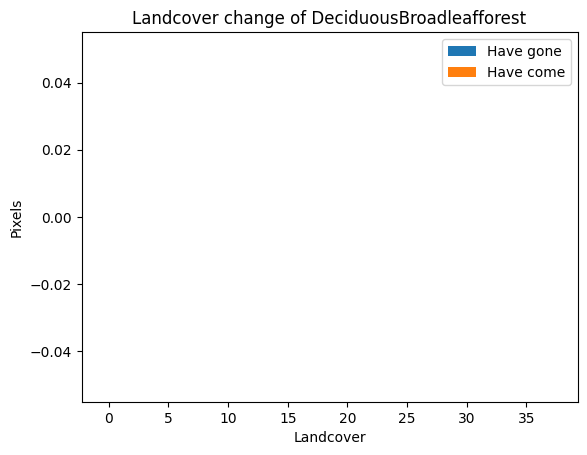

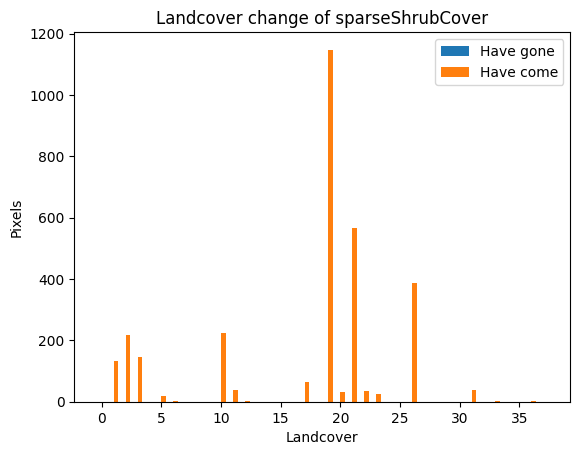

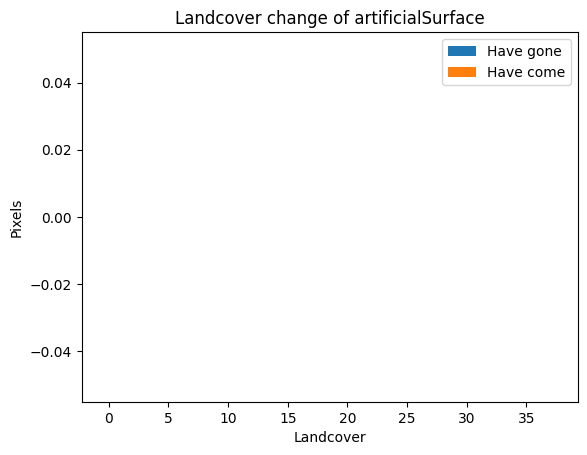

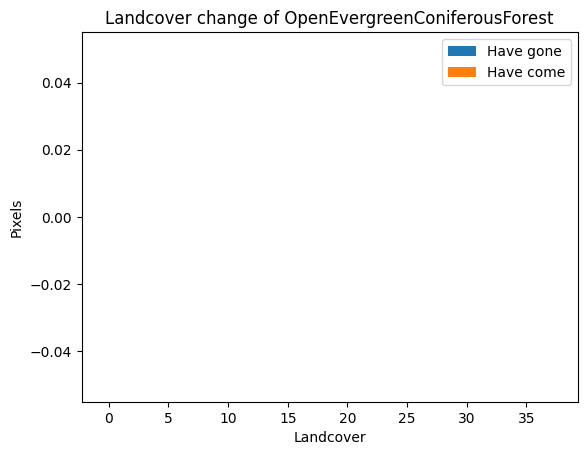

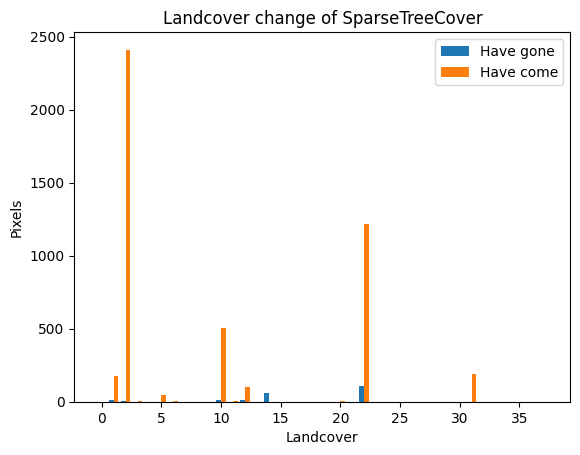

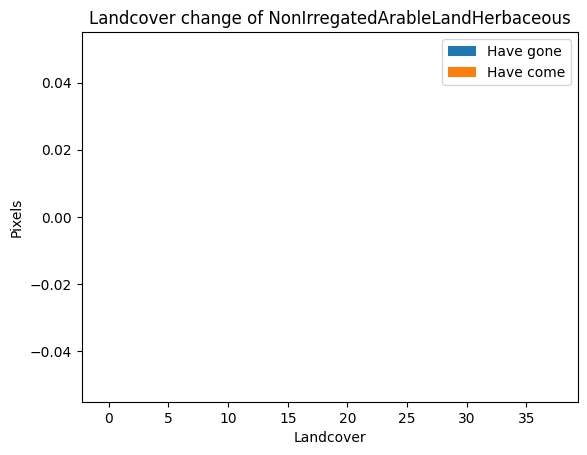

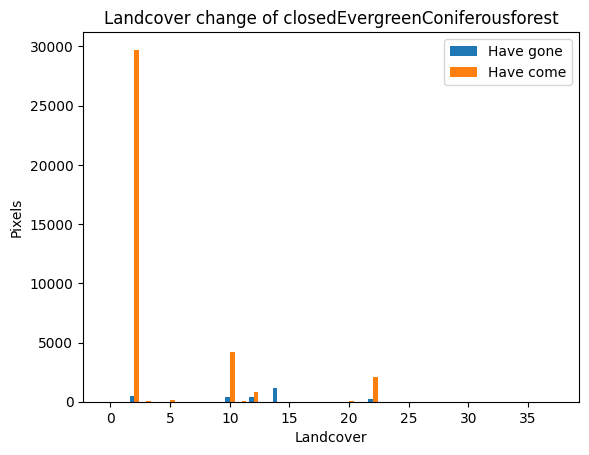

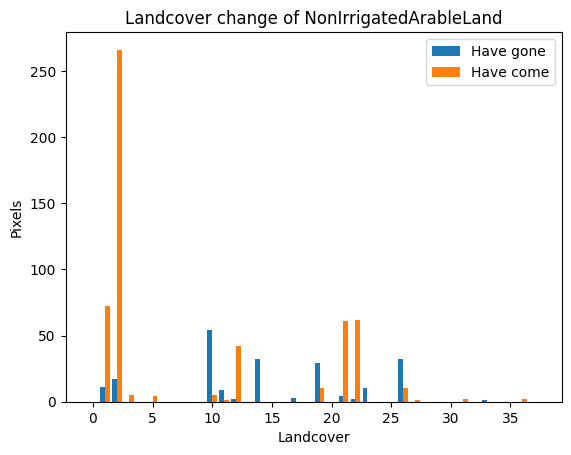

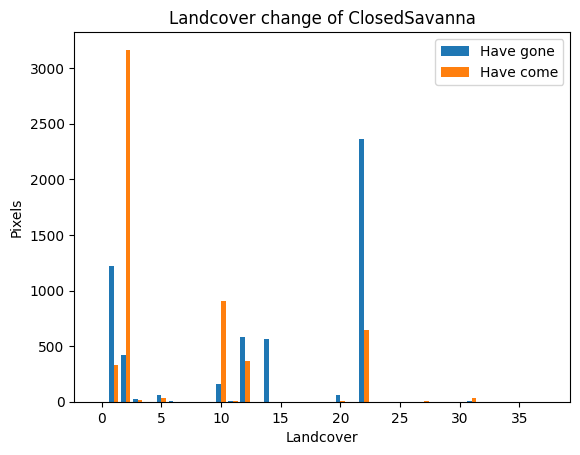

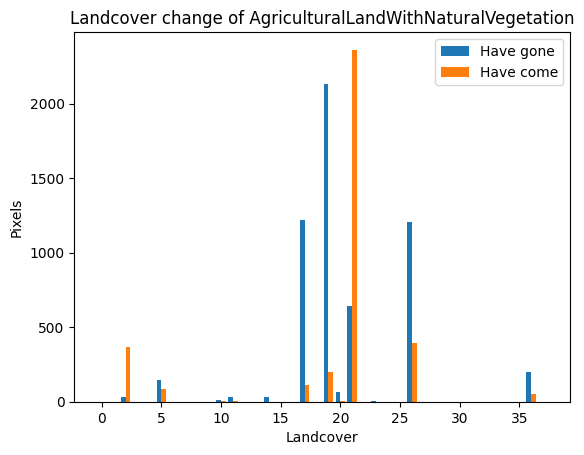

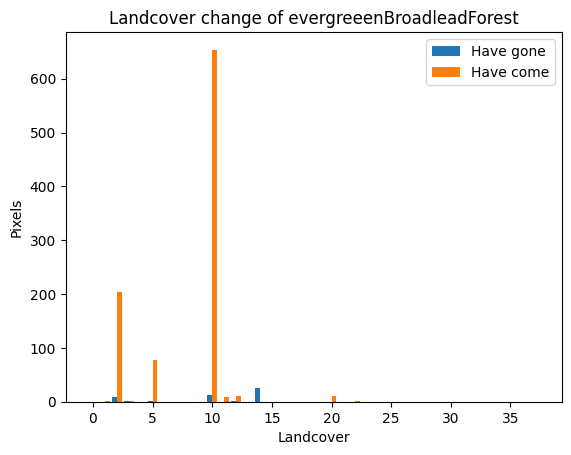

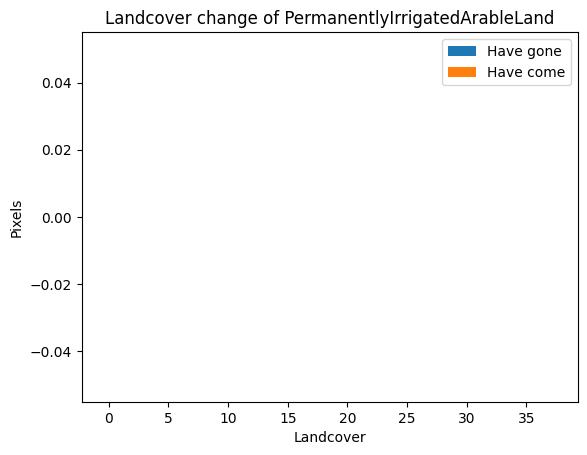

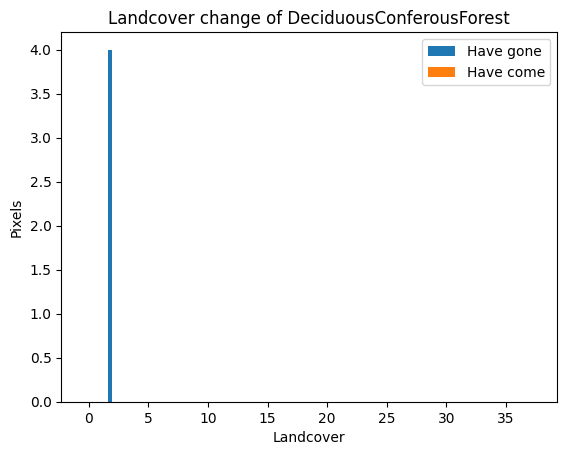

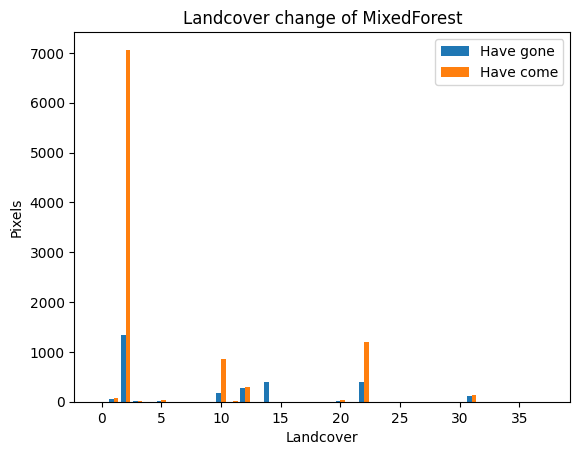

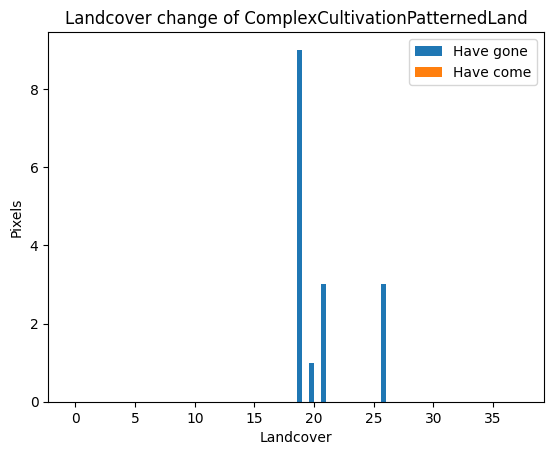

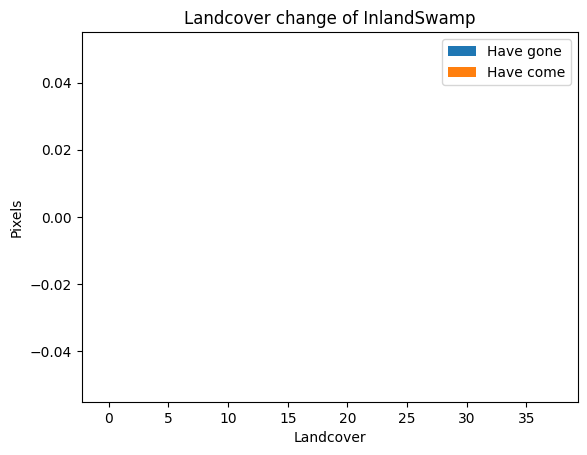

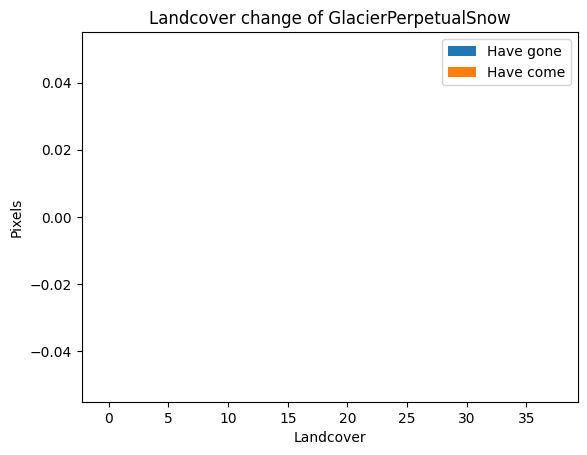

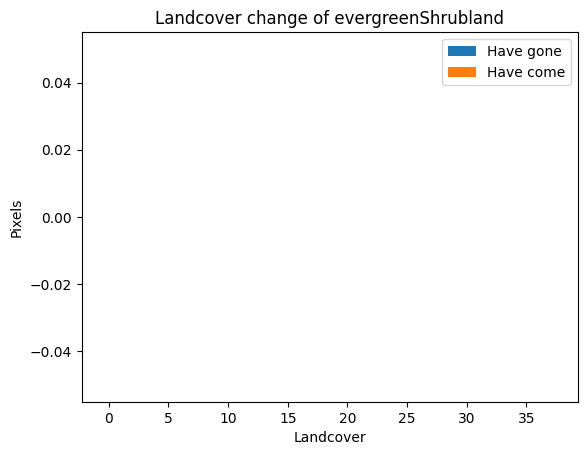

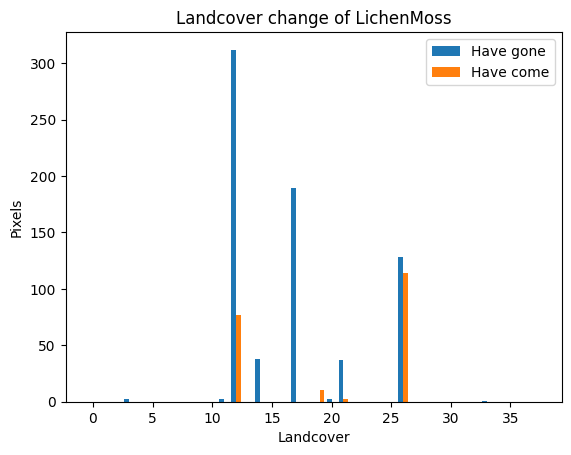

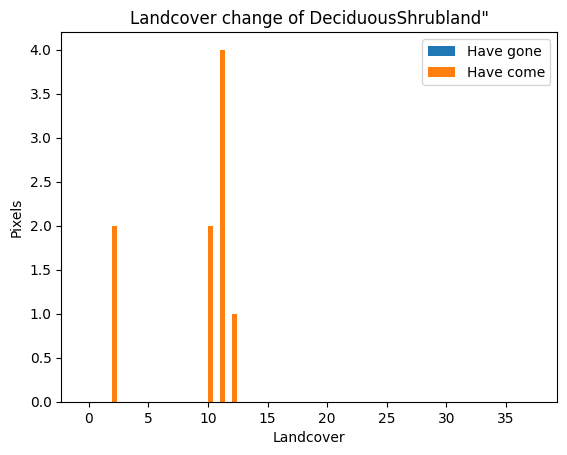

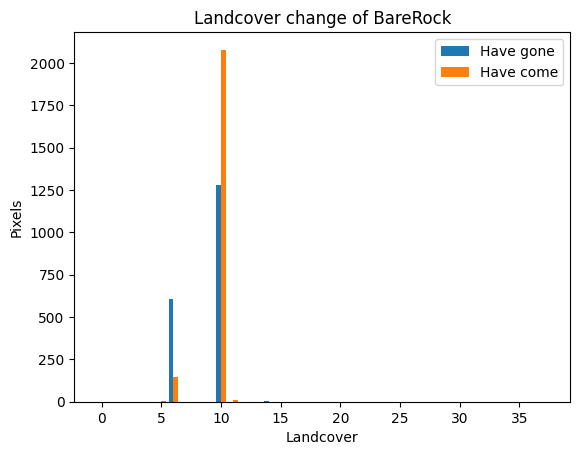

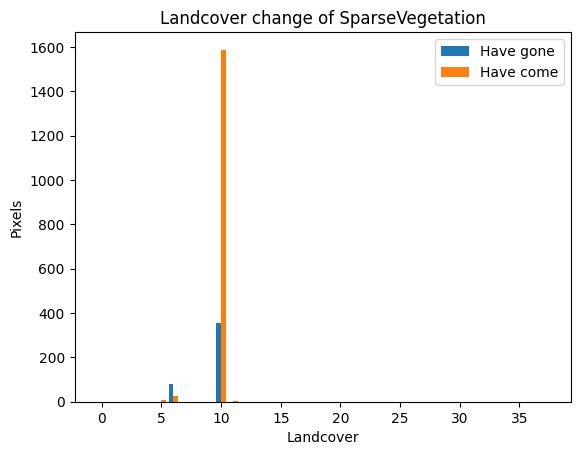

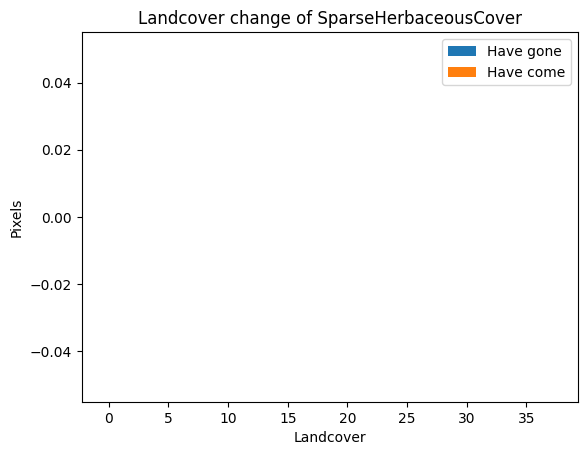

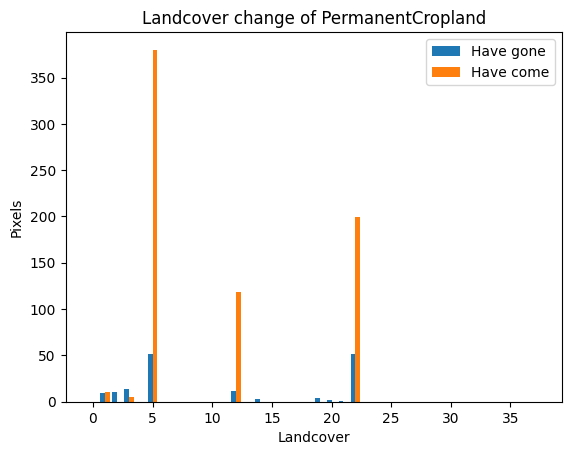

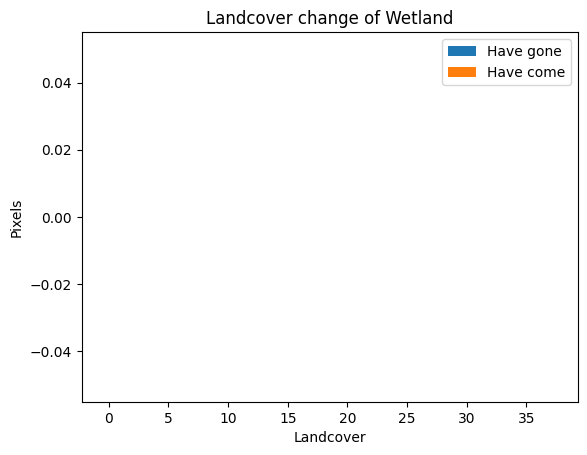

In [107]:
landcover=list(range(38))
X_axis = np.arange(len(landcover)) 

for i in range(1,38):
    data=cambio[i]
    plt.bar(X_axis-0.2, cambio[i], width = 0.4, label="Have gone")
    plt.bar(X_axis+0.2, come[i], width = 0.4, label="Have come")
    
    plt.xlabel("Landcover")
    plt.ylabel("Pixels")
    plt.title("Landcover change of "+etiqueta[i])
    plt.legend()
    plt.show()



We create a list where it says how many pixels there are in each landcover in each year

In [98]:
list_time_series=[[0 for k in range(len(years))] for i in range(len(etiqueta))]
for a in range(len(years)):
    for i in range(1253):
        for j in range(1472):
            list_time_series[modis_stack[a][0,i,j]][a]+=1

We represent together the time series of each landcover and the bar plots of before

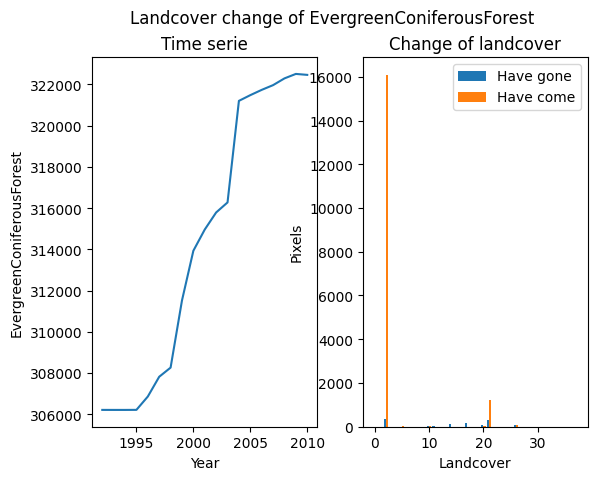

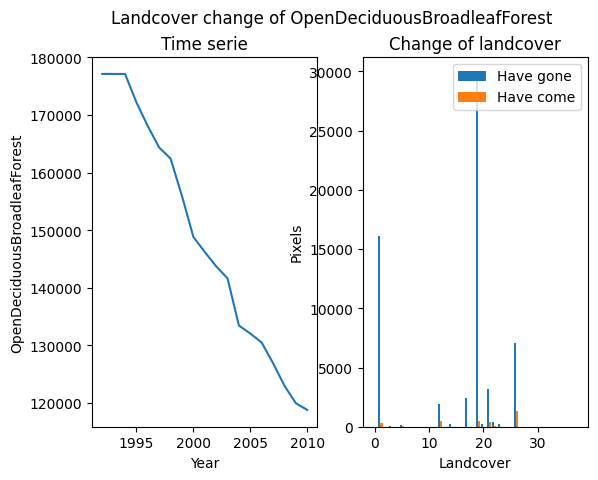

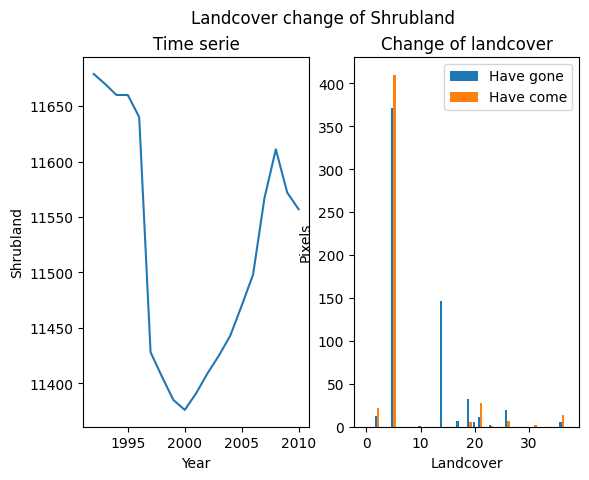

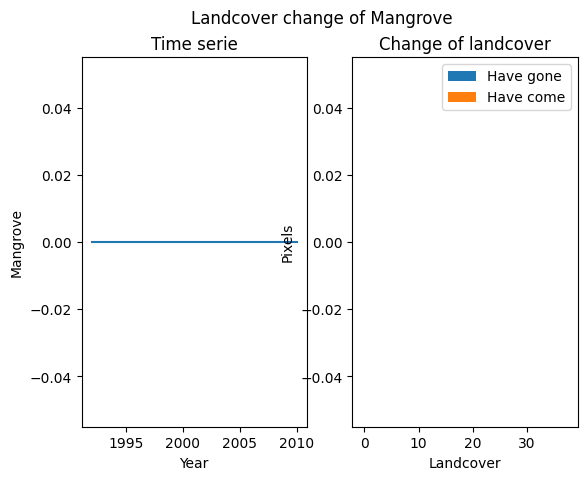

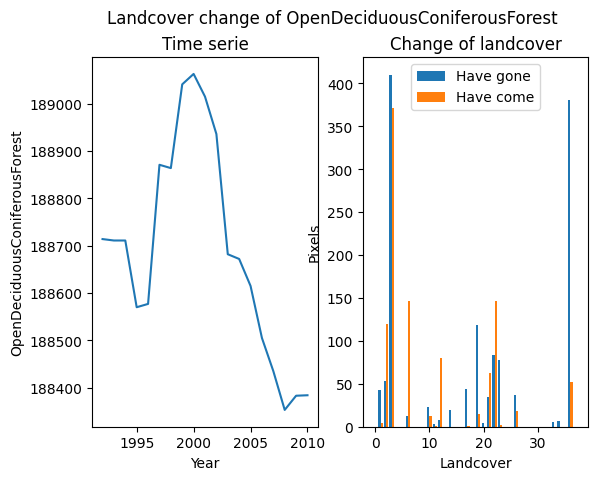

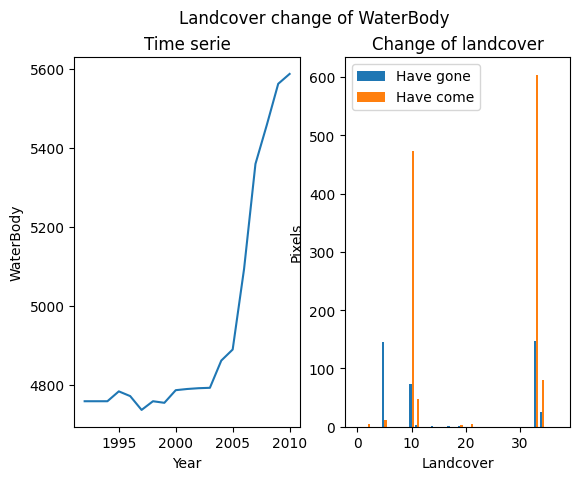

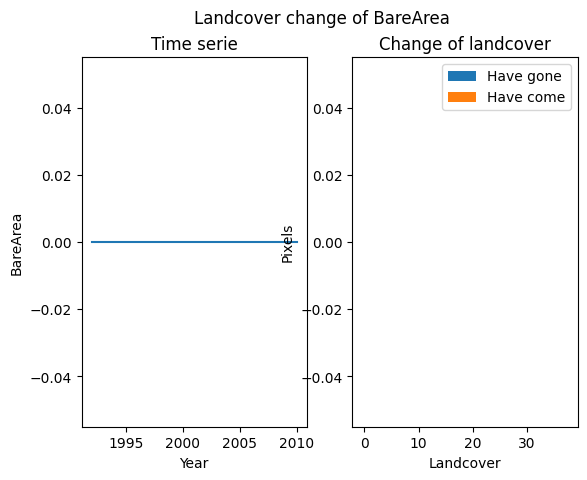

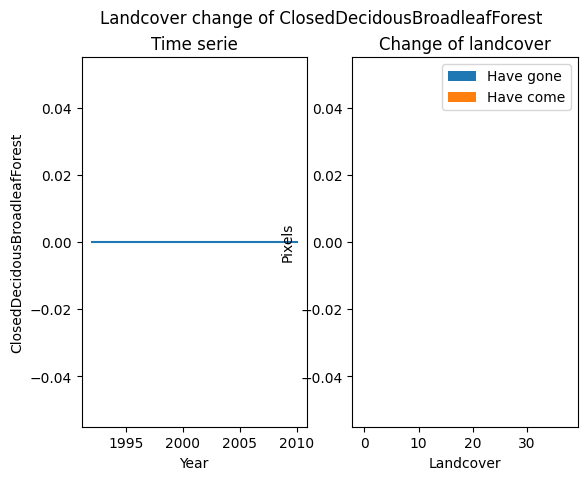

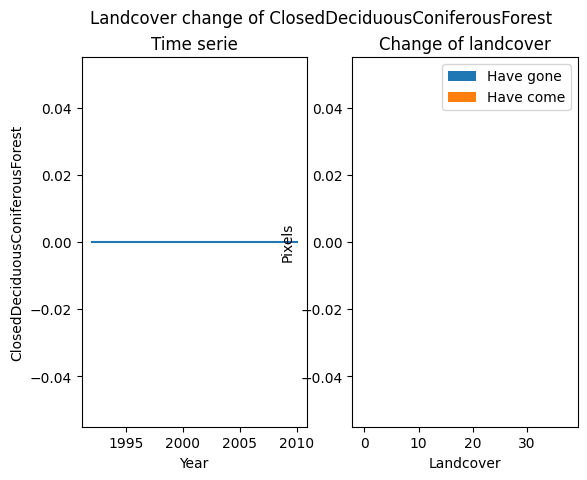

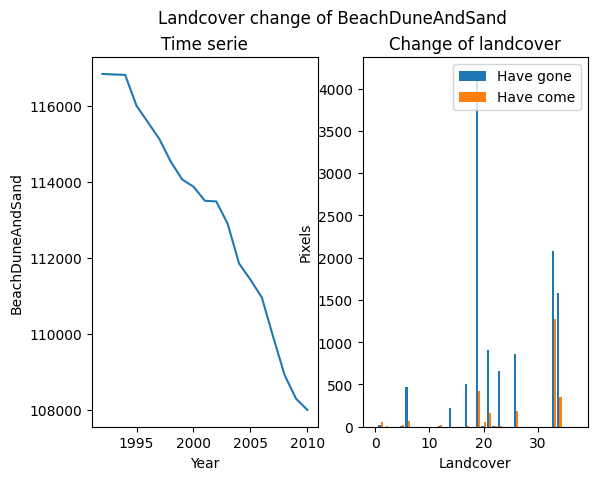

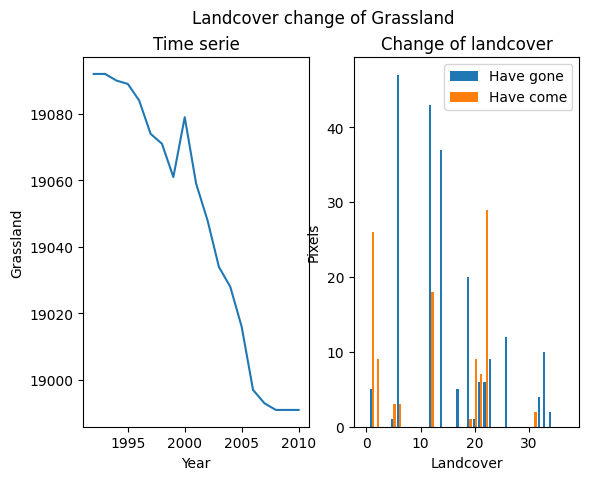

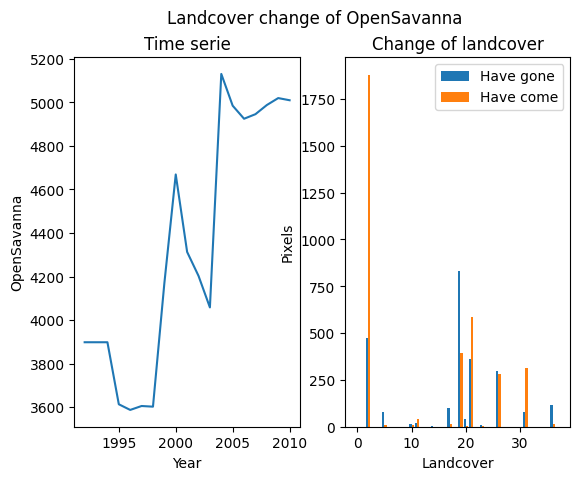

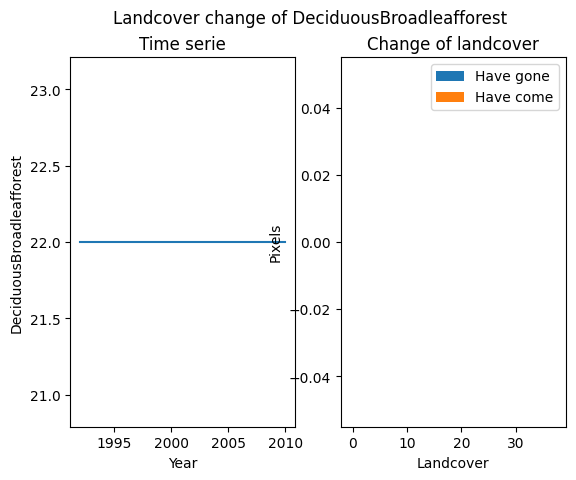

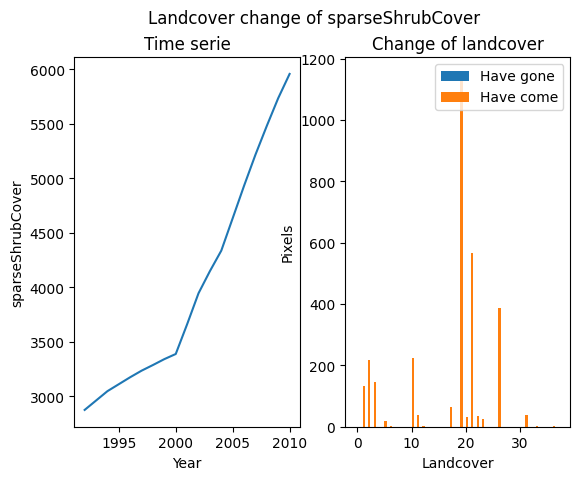

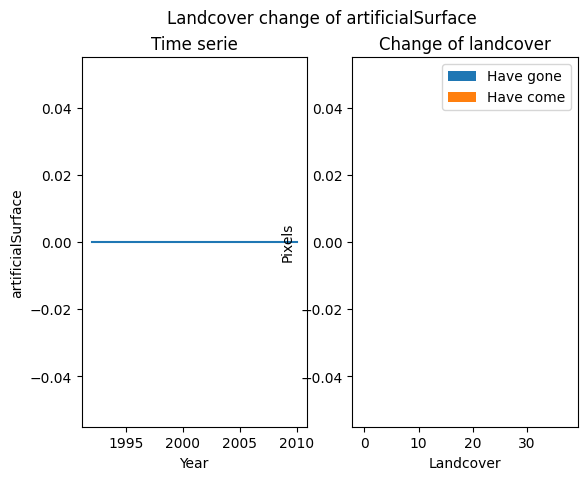

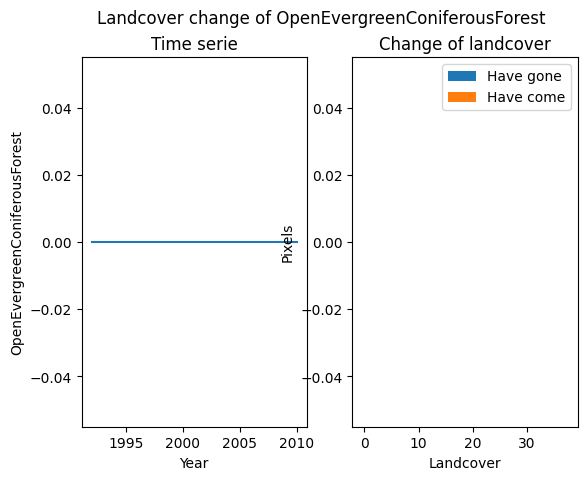

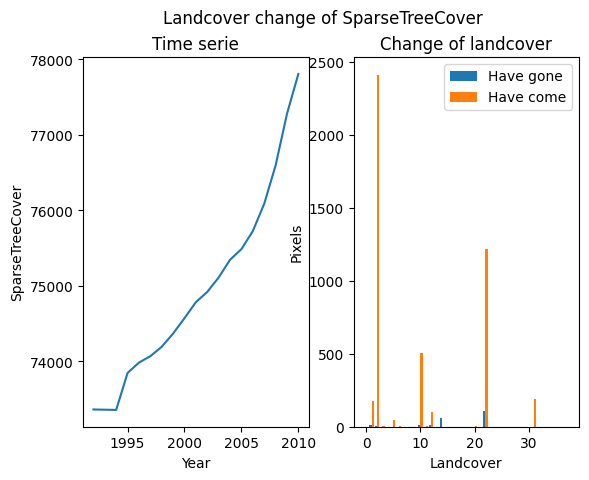

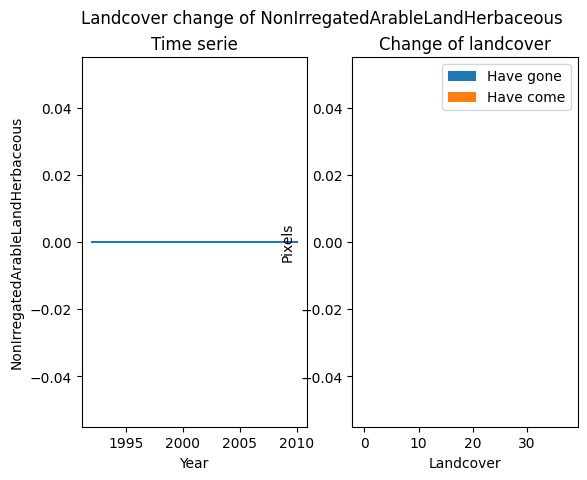

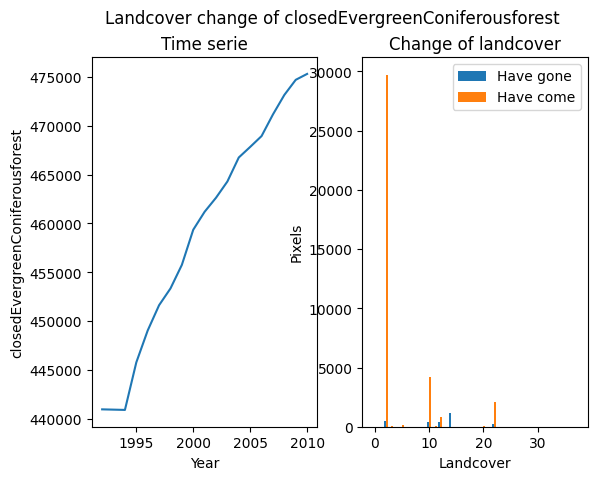

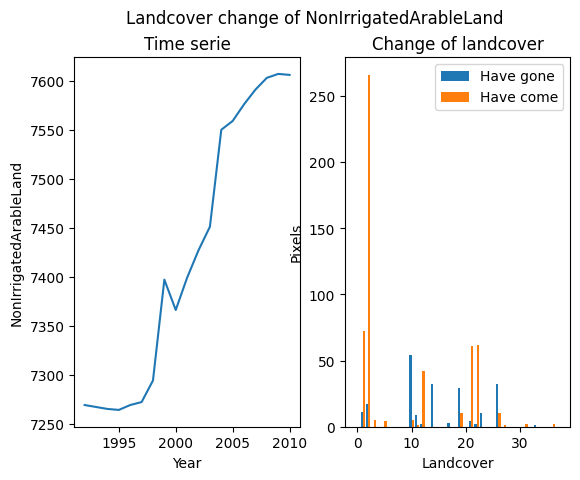

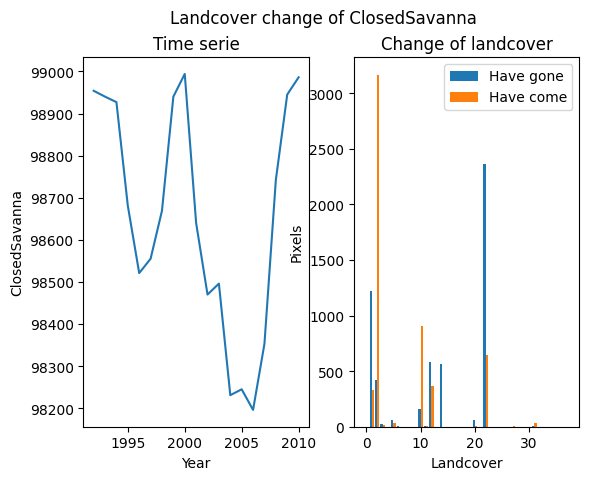

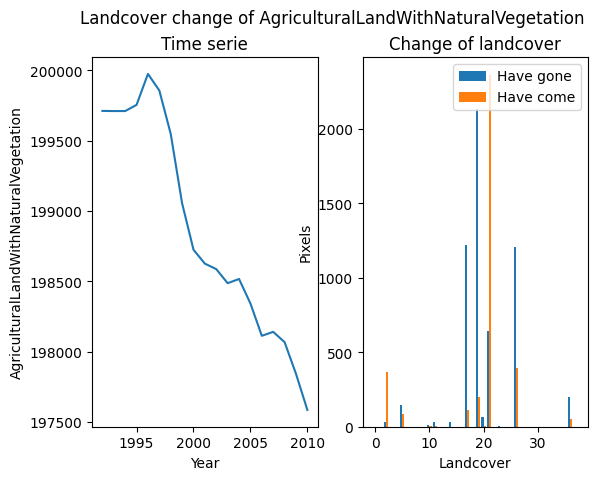

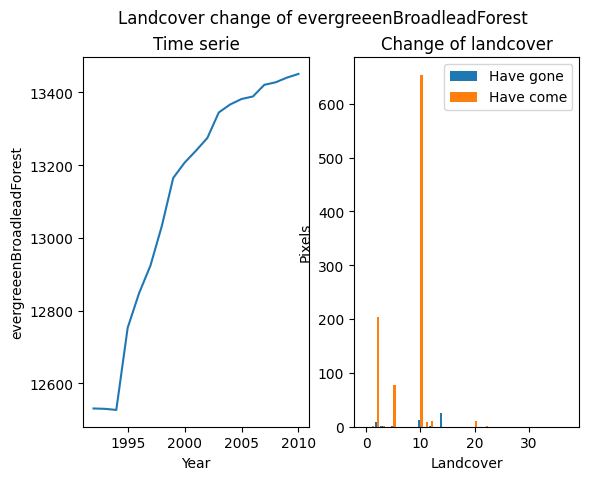

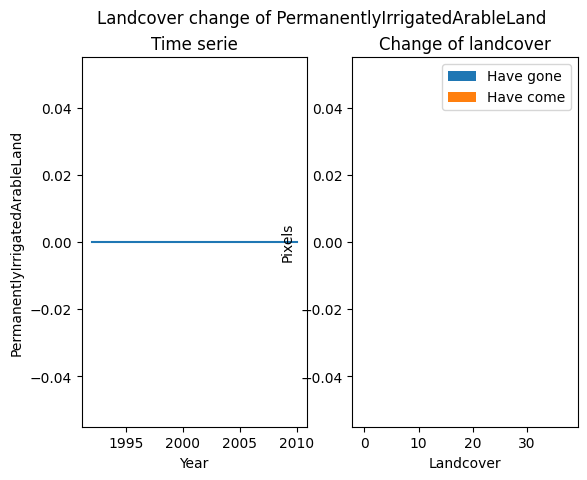

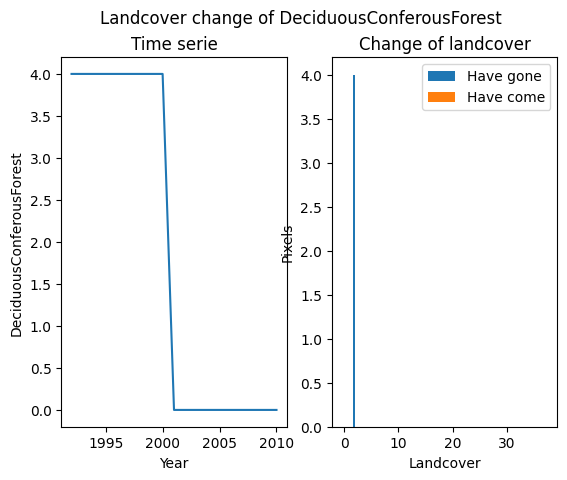

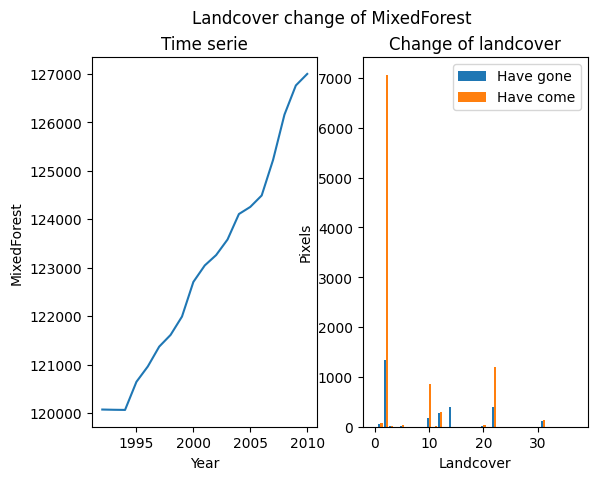

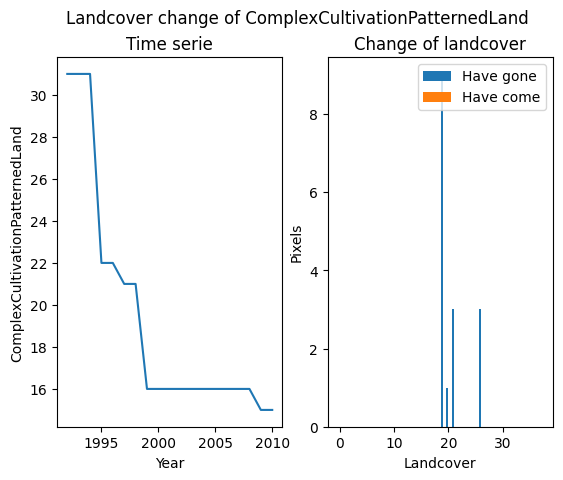

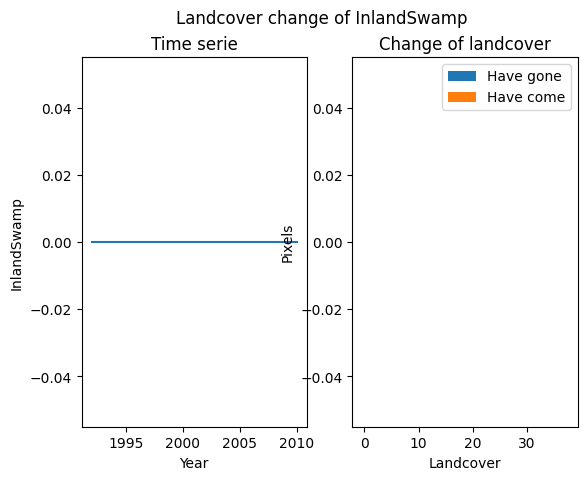

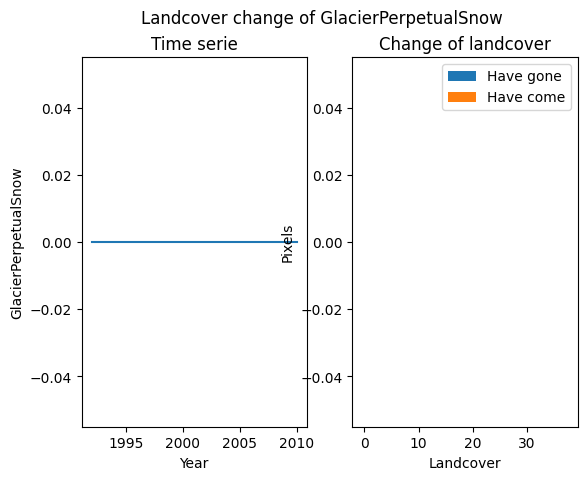

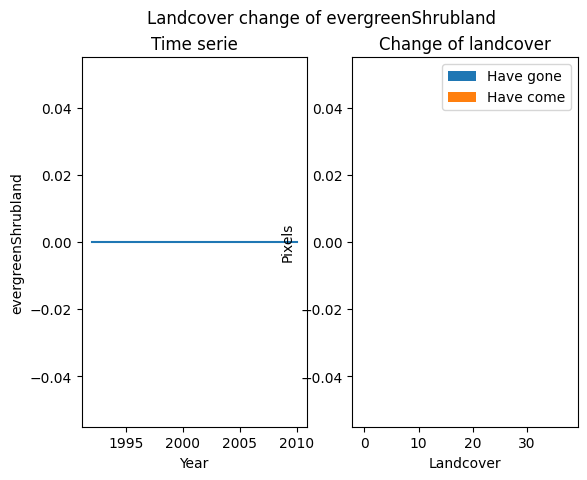

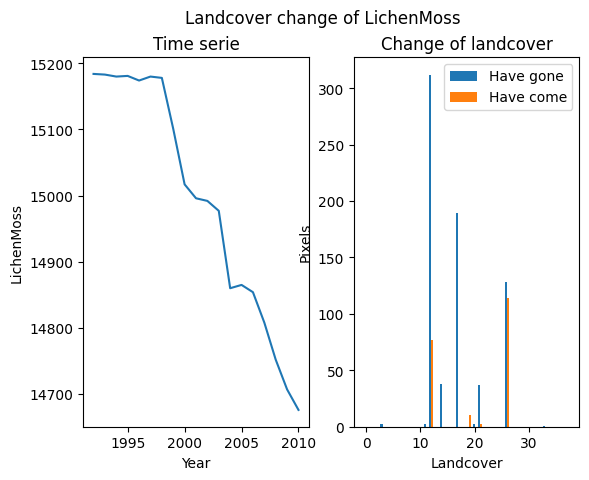

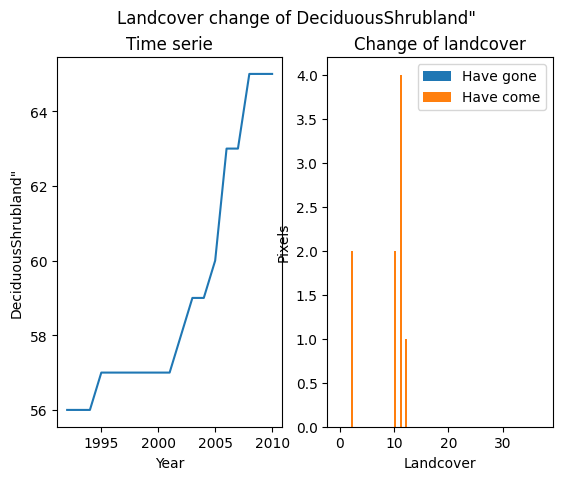

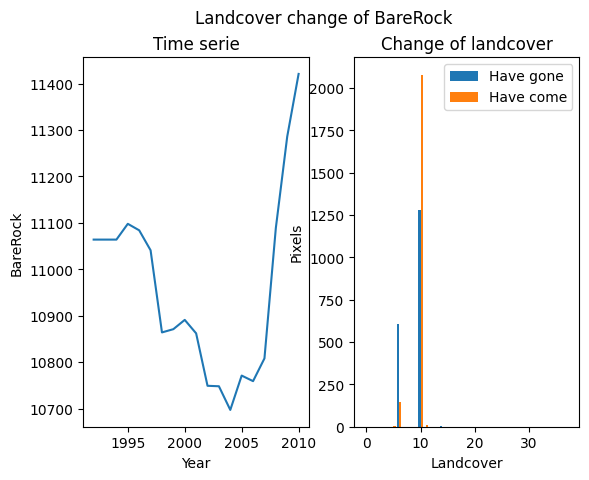

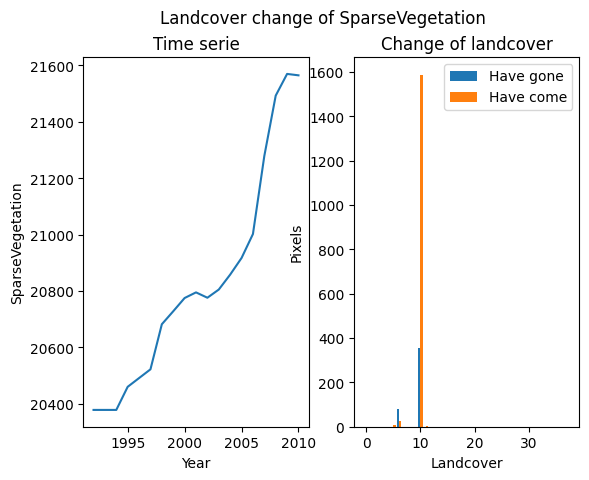

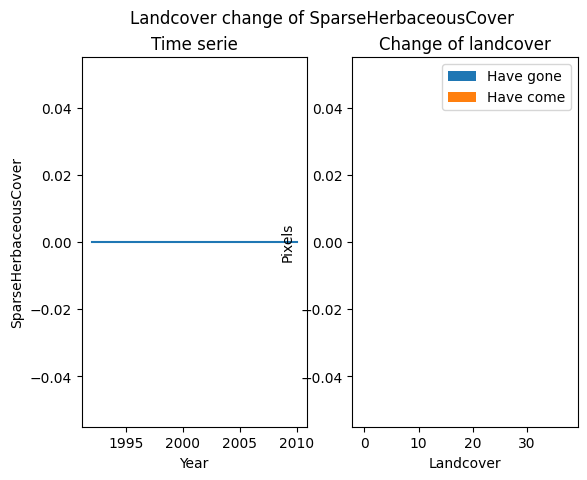

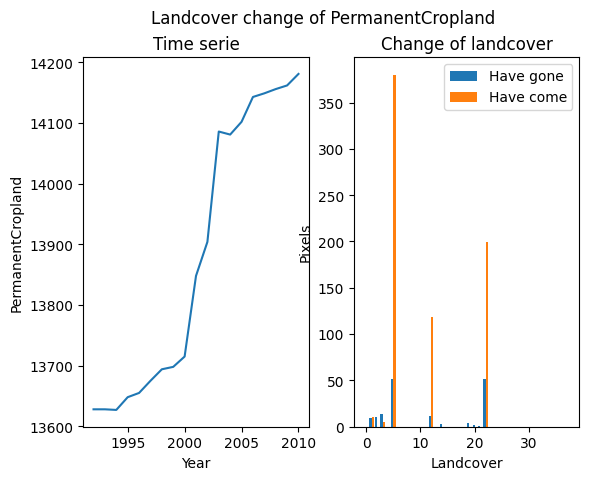

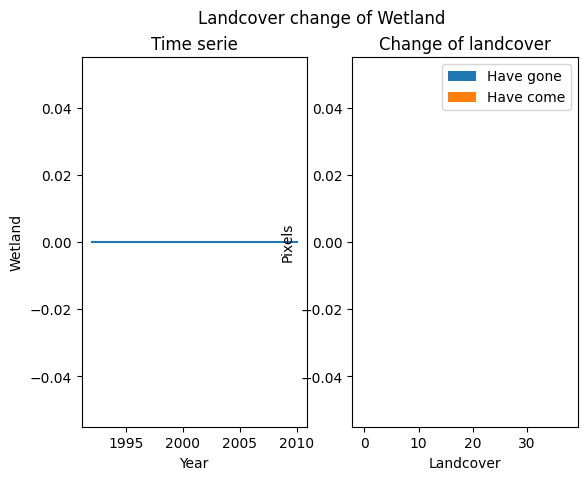

In [109]:
for i in range(1,38):
    plt.subplot(121)
    plt.plot(years,np.array(list_time_series[i], dtype=int))
    plt.xlabel("Year")
    plt.ylabel(etiqueta[i])
    plt.title("Time serie")

    plt.subplot(122)
    plt.bar(X_axis-0.2, cambio[i], width = 0.4, label="Have gone")
    plt.bar(X_axis+0.2, come[i], width = 0.4, label="Have come")
    plt.xlabel("Landcover")
    plt.ylabel("Pixels")
    plt.title("Change of landcover")
    plt.legend()

    plt.suptitle("Landcover change of "+etiqueta[i])
    plt.show()
#Grassland=np.array(list_of_lists[11], dtype=int)